In [2]:
import matplotlib
import matplotlib.pyplot as plt
import json
import numpy as np
import os

In [3]:
timesJsonString = b'''{
    "gaia.cs.umass.edu/pearson.png": {
        "cached": 0.007000923156738281,
        "nonCached": 0.2009899616241455
    },
    "gaia.cs.umass.edu/wireshark-labs/HTTP-wireshark-file1.html": {
        "cached": 0.006999969482421875,
        "nonCached": 0.21599984169006348
    },
    "gaia.cs.umass.edu/wireshark-labs/HTTP-wireshark-file2.html": {
        "cached": 0.007000923156738281,
        "nonCached": 0.1960010528564453
    },
    "gaia.cs.umass.edu/wireshark-labs/HTTP-wireshark-file3.html": {
        "cached": 0.003000020980834961,
        "nonCached": 0.19999313354492188
    },
    "gaia.cs.umass.edu/wireshark-labs/HTTP-wireshark-file4.html": {
        "cached": 0.007997989654541016,
        "nonCached": 0.3979969024658203
    },
    "kurose.cslash.net/8E_cover_small.jpg": {
        "cached": 0.00800013542175293,
        "nonCached": 0.312999963760376
    },
    "slack-imgs.com3": {
        "cached": 0.0010008811950683594,
        "nonCached": 0.3080010414123535
    }
}'''

In [4]:
# for line in timesJsonString:# obj now contains a dict of the data
domainCacheLoadTimes = json.loads(timesJsonString)
domains = []
nonCachedLoadTimes = []
cachedLoadTimes = []

for domain in domainCacheLoadTimes:
    print(domain)

    nonCachedTime = int(domainCacheLoadTimes[domain]["nonCached"] * 10**3)
    cachedTime = int(domainCacheLoadTimes[domain]["cached"] * 10**3)

    domains.append(domain)
    nonCachedLoadTimes.append(nonCachedTime)
    cachedLoadTimes.append(cachedTime)

    print("Not Cached Load Time: \t{:2.3f}ms".format(nonCachedTime))
    print("Cached Load Time: \t{:2.3f}ms\n".format(cachedTime))


gaia.cs.umass.edu/pearson.png
Not Cached Load Time: 	200.000ms
Cached Load Time: 	7.000ms

gaia.cs.umass.edu/wireshark-labs/HTTP-wireshark-file1.html
Not Cached Load Time: 	215.000ms
Cached Load Time: 	6.000ms

gaia.cs.umass.edu/wireshark-labs/HTTP-wireshark-file2.html
Not Cached Load Time: 	196.000ms
Cached Load Time: 	7.000ms

gaia.cs.umass.edu/wireshark-labs/HTTP-wireshark-file3.html
Not Cached Load Time: 	199.000ms
Cached Load Time: 	3.000ms

gaia.cs.umass.edu/wireshark-labs/HTTP-wireshark-file4.html
Not Cached Load Time: 	397.000ms
Cached Load Time: 	7.000ms

kurose.cslash.net/8E_cover_small.jpg
Not Cached Load Time: 	312.000ms
Cached Load Time: 	8.000ms

slack-imgs.com3
Not Cached Load Time: 	308.000ms
Cached Load Time: 	1.000ms



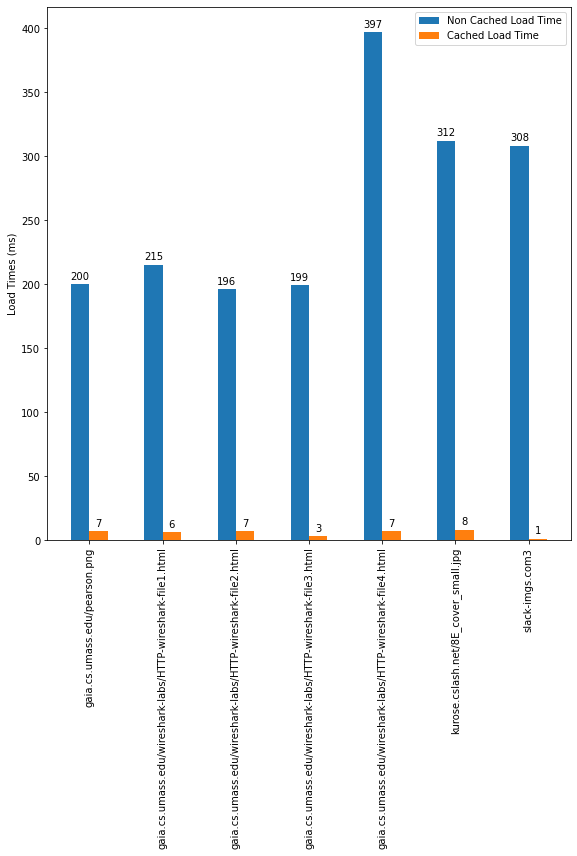

In [6]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

x = np.arange(len(domains))
width = 0.25

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
fig.tight_layout()
ax.set_ylabel('Load Times (ms)')
ax.set_xticks(x)
ax.set_xticklabels(domains, rotation="vertical")
rects1 = ax.bar(x - width/2, nonCachedLoadTimes, width, label='Non Cached Load Time')
rects2 = ax.bar(x + width/2, cachedLoadTimes, width, label='Cached Load Time')
autolabel(rects1)
autolabel(rects2)
ax.legend()
# plt.savefig("C:\\Users\\noaht\\Google Drive\\School\\2020-2021\\EEC173A-152A\\Programming\\2/loadTimesFig.png", papertype="letter", bbox_inches=fig.bbox)
plt.show()
